## Titanic Passengers Survival Prediction

We will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc) step by step.

We'll cover the followings:

1. Problem understanding and definition

2. Data collection and preparation
   * 2.1: Loading the data files
   * 2.2: Data Description
   * 2.3: Load the data

3. Data understanding(Exploratory Data Analysis (EDA))
   * 3.1: Exploring missing data
   * 3.2: Ditribution between features

4. Feature Engineering and Data Processing
   * 4.1: Handling features
   * 4.2: Handling Missing Data
   * 4.3: Converting Features

5. Model building
   * Decision Tree
   * Random Forest
   * Logistic Regression
   * k-Nearest Neighbors
   * Gaussian Naive Bayes
   * Support Vector Machines
   * Voting Classifier

6. Model Evaluation
   * 6.1: K-Fold Cross Validation
   * 6.2: Feature importance
   * 6.3: Hyperparameter Tuning
   * 6.4: Further evaluation

7. Conclusion


#### **1. Problem understanding and definition**
In this challenge, we need to complete the analysis of what sorts of people were most likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy.

##### **About the combined:**

There are three files in the combined: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

1. `train.csv:` contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). The values in the second column ("Survived") can be used to determine whether each passenger survived or not:
- if it's a "1", the passenger survived.
- if it's a "0", the passenger died.
For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

2. `test.csv:` using the patterns we find in train.csv, we have to predict whether the other 418 passengers on board (in test.csv) survived.

3. `gender_submission.csv:` file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different.
- a "PassengerId" column containing the IDs of each passenger from test.csv.
- a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

The goal is to have a prediction file with exactly 2 columns:
- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

#### **2. Data collection and preparation**

##### **2.1: Loading the data files**    
Here we import the data. For this analysis, we will be exclusively working with the Training set. We will be validating based on data from the training set as well. For our final submissions, we will make predictions based on the test set.

In [1]:
# data analysis and data wrangling
import numpy as np # Linear algebra
import pandas as pd # Data manipulation and analysis
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# Model Wrangling
from sklearn.model_selection import cross_val_score, GridSearchCV

##### **2.2: Data Description**    

The data has been split into two groups:
- **training set (train.csv)**    
The training set includes passengers survival status (also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass (passenger class) is used to create the machine learning model.
- **test set (test.csv)**    
The test set should be used to see how well the model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.

##### **2.3: Load the data**

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

**Inspect the first 3 rows for both train and test set**

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### **3. Data understanding using Exploratory Data Analysis (EDA)**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. In summary, it's an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

**Check the columns**

In [26]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**The training-set has 891 rows and 11 features + the target variable (survived).**

In [27]:
train_df.shape

(891, 12)

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training data of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [28]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features?**

- Names are unique across the data (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [29]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Which features are categorical?**

- **Categorical**: Survived, Sex, and Embarked. **Ordinal**: Pclass.

**Which features are numerical?**

- **Continous**: Age, Fare. **Discrete**: SibSp, Parch.

**Which features are mixed data types?**

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

- Cabin > Age > Embarked features contain a number of null values in that order for the training data.
- Cabin > Age are incomplete in case of test data.

**What are the data types for various features?**

- Seven features are integer or floats. Six in case of test data.
- Five features are strings (object).

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **3.1: Exploring missing data**

In [31]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The 'Embarked' feature has only 2 missing values, which can easily be filled or dropped. It will be much more tricky to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the data since 77% is missing.

**Check for duplicated rows**

In [32]:
train_df.duplicated().sum()

0

**"The captain goes down with the ship"**

it is a maritime tradition that a sea captain holds ultimate responsibility for both his/her ship and everyone embarked on it, and that in an emergency, he/she will either save them or die trying. In this case, Captain Edward Gifford Crosby went down with Titanic in a heroic gesture trying to save the passengers.

In [13]:
train_df[train_df['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


##### **3.2: Ditribution between features**

In [33]:
# look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

KeyError: "['SibSp', 'Parch'] not in index"

In [32]:
for dnum in df_num.columns:
    plt.hist(df_num[dnum])
    plt.title("The distributions for all numeric variables")
    plt.xlabel(dnum)
    plt.ylabel("Counts")
    plt.show()

NameError: name 'df_num' is not defined

In [43]:
df_cat['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

In [ ]:
for dcat in df_cat.columns:
    sns.barplot(df_cat[dcat].value_counts().index,df_cat[dcat].value_counts()).set_title(dcat)
    plt.show()

In [17]:
train_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


As previously mentioned, women are much more likely to survive than men. 74% of the women survived, while only 18% of men survived.

**Looking deeper into differences between females and males statistics**

In [34]:
train_df.groupby(['Sex','Pclass']).mean()

Survived        Age        Fare  Embarked  relative   isAlone  \
Sex Pclass                                                                  
0   1       0.368852  39.155738   66.836066  0.360656  0.590164  0.614754   
    2       0.157407  30.564815   19.527778  0.111111  0.564815  0.666667   
    3       0.135447  27.164265   12.167147  0.348703  0.723343  0.760807   
1   1       0.968085  34.074468  105.691489  0.478723  1.010638  0.361702   
    2       0.921053  28.723684   21.776316  0.144737  1.092105  0.421053   
    3       0.500000  23.847222   15.597222  0.618056  1.694444  0.416667   

                Deck     Title  
Sex Pclass                      
0   1       4.040984  1.467213  
    2       7.851852  1.546296  
    3       7.959654  1.242075  
1   1       3.765957  2.553191  
    2       7.631579  2.539474  
    3       7.937500  2.291667

We are grouping passengers based on Sex and Ticket class (Pclass). Notice the difference between survival rates between men and women. Women are much more likely to survive than men, specially women in the first and second class. It also shows that men in the first class are almost 3-times more likely to survive than men in the third class.

**Analyzing featurs with pivot table**

In [64]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [65]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Comparing survival with each of these categorical variables**

In [55]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [56]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [57]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


**Children below 18 years of age have higher chances of surviving.**

In [21]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

**Destribution of Age and Sex**

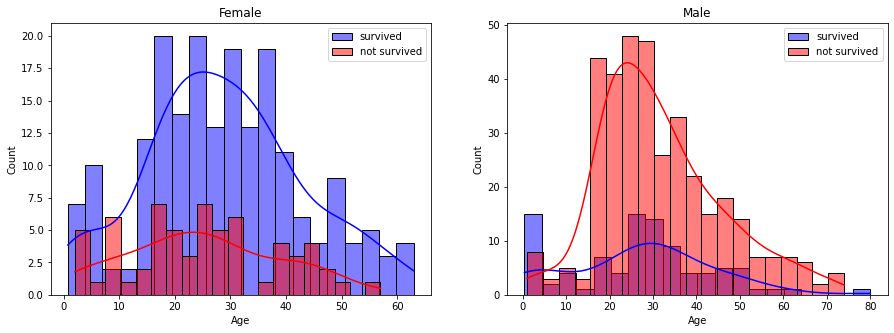

In [22]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')
# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

We can see that:
- men have a higher probability of survival when they are between 18 and 35 years old. 
- For women, the survival chances are higher between 15 and 40 years old.
- For men the probability of survival is very low between the ages of 5 and 18, and after 35, but that isn’t true for women. 
- Another thing to note is that infants have a higher probability of survival.

**Distribution of Pclass and Survived**

Text(0.5, 1.0, 'Passenger Class Distribution - Survived Passengers')

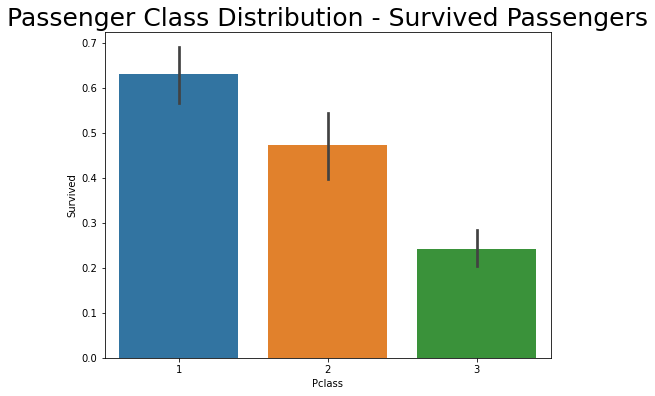

In [23]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25)

Text(0.5, 1.0, 'Passenger Class Distribution - Survived vs Non-Survived')

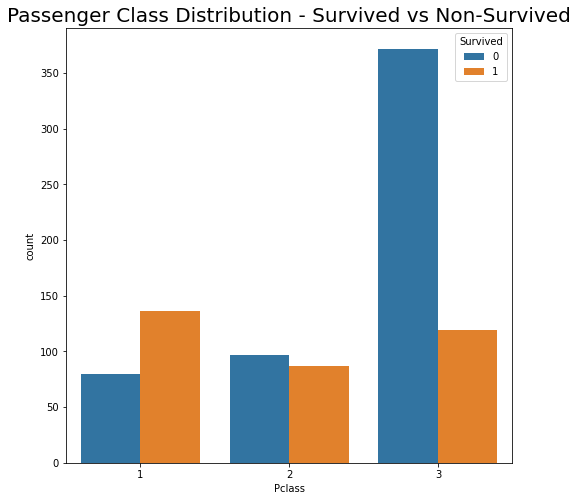

In [66]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=20)

The graphs above clearly shows that economic status (Pclass) played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:
- 63% of the 1st class passengers survived the Titanic wreck
- 48% of the 2nd class passenger survived
- Only 24% of the 3rd class passengers survived

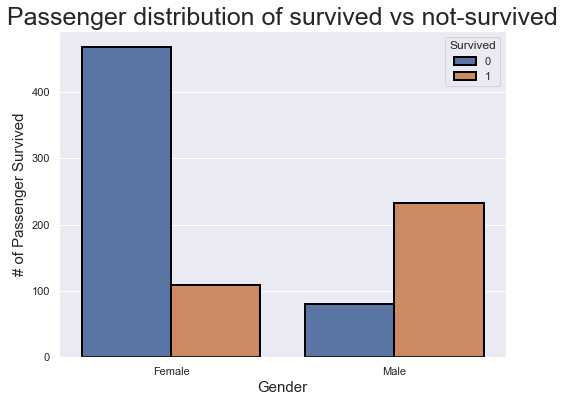

In [25]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)
# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
# Fixing xticks
plt.xticks(sorted(train_df.Survived.unique()),labels);

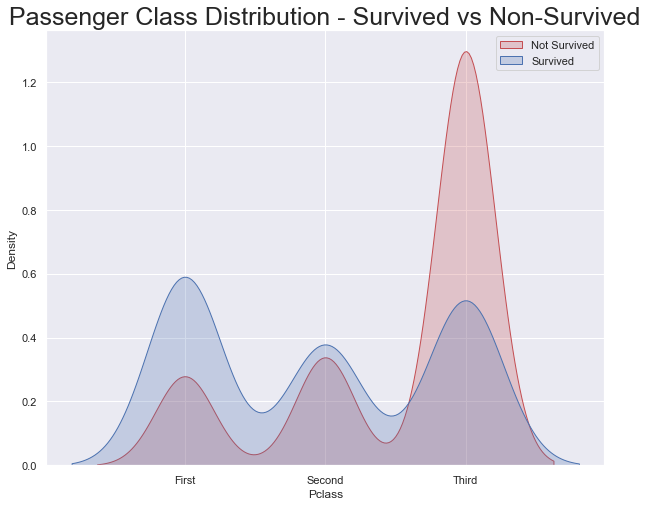

In [26]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels);

**Correlation Matrix and Heatmap**

We need to convert some categorical values into numerical to see a better correlation. For now we will do it without converting.

<AxesSubplot:>

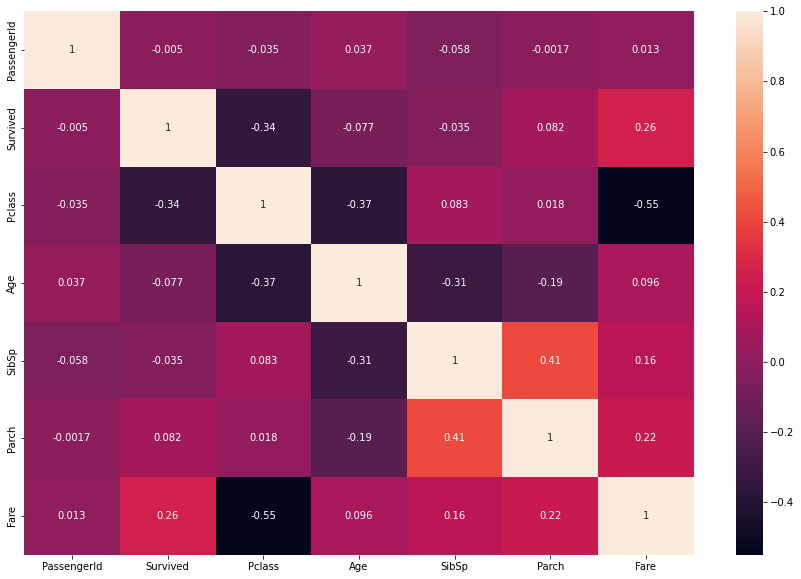

In [67]:
train_df.corr()['Survived'].sort_values(ascending=False)
corr = train_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

We notice from the heatmap above that:
- Parents and sibling like to travel together (light blue squares)
- Age has a high negative correlation with number of siblings
- etc..

In [68]:
train_df.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

**Applying some useful libraries to get a full description of data**

In [7]:
from pycaret.classification import *
setup(data=train_df,target='Survived',fold_shuffle=True,data_split_shuffle=True,session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8122,0.8712,0.6946,0.7928,0.7371,0.5927,0.5985,2.4460
ridge,Ridge Classifier,0.8122,0.0000,0.7074,0.7815,0.7400,0.5942,0.5981,0.1600
lda,Linear Discriminant Analysis,0.8106,0.8703,0.7074,0.7782,0.7384,0.5911,0.5950,0.2000
et,Extra Trees Classifier,0.7995,0.8443,0.5900,0.8516,0.6923,0.5511,0.5747,0.3550
rf,Random Forest Classifier,0.7047,0.8383,0.2844,0.8735,0.4166,0.2849,0.3696,0.3380
lightgbm,Light Gradient Boosting Machine,0.6998,0.7355,0.2848,0.8312,0.4153,0.2762,0.3500,0.2560
nb,Naive Bayes,0.6949,0.8230,0.2716,0.8299,0.3938,0.2603,0.3357,0.1930
ada,Ada Boost Classifier,0.6934,0.8115,0.2763,0.8078,0.4026,0.2606,0.3306,0.3140
dt,Decision Tree Classifier,0.6918,0.6126,0.2719,0.8229,0.3959,0.2558,0.3306,0.2150
gbc,Gradient Boosting Classifier,0.6918,0.7766,0.2719,0.8065,0.3960,0.2554,0.3260,0.2680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(train_df, title="Titanic Profiling Report")

#### **4. Feature Engineering and Data Processing**

##### **4.1: Handling Features**

**Drop 'PassengerId'**    
First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons' survival probability.

In [3]:
train_df = train_df.drop("PassengerId",axis=1)
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Combining SibSp and Parch**    
SibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below, and also a value that shows if someone is alone or not.

In [4]:
combined = [train_df, test_df]
for data in combined:
    data['relative'] = data['SibSp'] + data['Parch']
    data.loc[data['relative'] > 0, 'isAlone'] = 0
    data.loc[data['relative'] == 0, 'isAlone'] = 1
    data['isAlone'] = data['isAlone'].astype(int)
train_df['isAlone'].value_counts()
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relative,isAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1


In [5]:
train_df[['relative', 'Survived']].groupby(['relative'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,relative,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [6]:
train_df[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean()

,isAlone,Survived
0,0,0.505650
1,1,0.303538


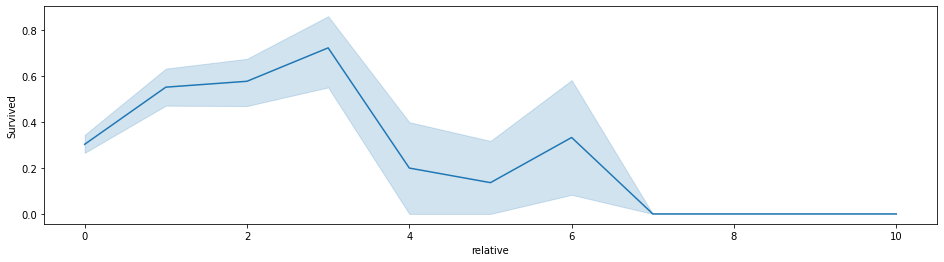

In [7]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relative',y='Survived', data=train_df)

##### **4.2: Missing Data**

As a reminder, we have to deal with Cabin (687 missing values), Embarked (2 missing values) and Age (177 missing values).

**Cabin**     
We can either drop it or convert it to a new column that shows the deck of the cabin, we will convert the feature into a numeric variable. The missing values will be converted to zero. Note that the actual decks of the titanic, ranging from A to G.

In [8]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
combined = [train_df, test_df]
for data in combined:
    data['Cabin'] = data['Cabin'].fillna("U0")
    data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    data['Deck'] = data['Deck'].map(deck)
    data['Deck'] = data['Deck'].fillna(0)
    data['Deck'] = data['Deck'].astype(int)
# We can now drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

**Age**    
We can fill this column with its mean()

In [9]:
combined = [train_df, test_df]
mean = train_df['Age'].mean()
for data in combined:
    data['Age'].fillna(mean,inplace=True)

**Embarked**    
Since the Embarked feature has only 2 missing values, we will fill these with the most common one.

In [10]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

We notice the most popular embark location is Southampton (S).

In [11]:
common_value = 'S'
combined = [train_df, test_df]
for data in combined:
    data['Embarked'] = data['Embarked'].fillna(common_value)
train_df['Embarked'].isnull().sum()

0

#### Wrangle data

##### **4.3: Converting Features**

In [12]:
train_df.info()
print("_"*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   relative  891 non-null    int64  
 9   isAlone   891 non-null    int32  
 10  Deck      891 non-null    int32  
dtypes: float64(2), int32(2), int64(3), object(4)
memory usage: 69.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null   

We can see that 'Fare' and it is a float data-type. Also, we need to deal with 4 categorical features: Name, Sex, Ticket, and Embarked

**Fare:** Converting 'Fare' from float64 to int64 using the astype() function provided by pandas.

In [13]:
combined = [train_df, test_df]
for data in combined:
    data['Fare'] = data['Fare'].fillna(0)
    data['Fare'] = data['Fare'].astype(int)
train_df.info()
print("_"*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    int32  
 7   Embarked  891 non-null    object 
 8   relative  891 non-null    int64  
 9   isAlone   891 non-null    int32  
 10  Deck      891 non-null    int32  
dtypes: float64(1), int32(3), int64(3), object(4)
memory usage: 66.3+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null   

Let us create Age bands and determine correlations with Survived.

In [129]:
# train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
# train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
# # Let us replace Age with ordinals based on these bands.
# for data in combined:
#     data.loc[ data['Age'] <= 16, 'Age'] = 0
#     data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
#     data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
#     data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
#     data.loc[ data['Age'] > 64, 'Age']
# train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relative,isAlone,Deck,Title
0,0,3,NaN,22,1,0,7,S,1,0,8,1
1,1,1,NaN,38,1,0,71,C,1,0,3,3
2,1,3,NaN,26,0,0,7,S,0,1,8,2
3,1,1,NaN,35,1,0,53,S,1,0,3,3
4,0,3,NaN,35,0,0,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,NaN,27,0,0,13,S,0,1,8,5
887,1,1,NaN,19,0,0,30,S,0,1,2,2
888,0,3,NaN,29,1,2,23,S,3,0,8,2
889,1,1,NaN,26,0,0,30,C,0,1,3,1


**Change Age data type to int**

In [14]:
data = [train_df, test_df]
for data in combined:
    data['Age'] = data['Age'].astype(int)
train_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,relative,isAlone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,373450,8,S,0,1,8


**Name:** Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called 'Title' out of it.

In [15]:
combined = [train_df, test_df]
for data in combined:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
combined = [train_df, test_df]
for data in combined:
    # Extract titles
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
    # Replace titles with a more common title or as Other
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    # Convert titles into numbers
    data['Title'] = data['Title'].map(titles)
    # Filling NaN with 0 just to be safe
    data['Title'] = data['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,relative,isAlone,Deck,Title
0,0,3,male,22,A/5 21171,7,S,1,0,8,1
1,1,1,female,38,PC 17599,71,C,1,0,3,3
2,1,3,female,26,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35,113803,53,S,1,0,3,3
4,0,3,male,35,373450,8,S,0,1,8,1


**Sex:** Convert feature 'Sex' into numeric values.

In [17]:
# train_df['Sex'] = train_df.Sex.map({'male':0,'female':1})
genders = {"male": 0, "female": 1}
combined = [train_df, test_df]
for data in combined:
    data['Sex'] = data['Sex'].map(genders)
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,relative,isAlone,Deck,Title
0,0,3,0,22,A/5 21171,7,S,1,0,8,1
1,1,1,1,38,PC 17599,71,C,1,0,3,3
2,1,3,1,26,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,1,35,113803,53,S,1,0,3,3
4,0,3,0,35,373450,8,S,0,1,8,1


**Ticket:**

In [18]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the 'Ticket' feature has 681 unique values, it would be very hard to convert them into an useful feature. Hence, we will drop it from the DataFrame.

In [19]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relative,isAlone,Deck,Title
0,0,3,0,22,7,S,1,0,8,1
1,1,1,1,38,71,C,1,0,3,3
2,1,3,1,26,7,S,0,1,8,2
3,1,1,1,35,53,S,1,0,3,3
4,0,3,0,35,8,S,0,1,8,1


**Convert 'Embarked' feature into numeric values.**

In [20]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
combined = [train_df, test_df]
for data in combined:
    data['Embarked'] = data.Embarked.map({"S":0,"C":1,"Q":2})
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relative,isAlone,Deck,Title
0,0,3,0,22,7,0,1,0,8,1
1,1,1,1,38,71,1,1,0,3,3
2,1,3,1,26,7,0,0,1,8,2
3,1,1,1,35,53,0,1,0,3,3
4,0,3,0,35,8,0,0,1,8,1


In [28]:
from pycaret.classification import *
setup(data=train_df,target='Survived',fold_shuffle=True,data_split_shuffle=True,session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 10)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [30]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8315,0.8610,0.7447,0.8034,0.7699,0.6378,0.6417,0.1400
lightgbm,Light Gradient Boosting Machine,0.8315,0.8511,0.7366,0.8134,0.7708,0.6381,0.6423,0.0870
ada,Ada Boost Classifier,0.8251,0.8519,0.7784,0.7694,0.7711,0.6300,0.6329,0.1610
xgboost,Extreme Gradient Boosting,0.8235,0.8481,0.7447,0.7865,0.7631,0.6228,0.6253,0.1440
rf,Random Forest Classifier,0.8186,0.8564,0.7491,0.7738,0.7587,0.6137,0.6164,0.2910
lr,Logistic Regression,0.8058,0.8638,0.7447,0.7479,0.7433,0.5874,0.5908,0.1050
ridge,Ridge Classifier,0.8058,0.0000,0.7241,0.7608,0.7391,0.5850,0.5883,0.0450
lda,Linear Discriminant Analysis,0.8041,0.8623,0.7241,0.7578,0.7378,0.5820,0.5851,0.0540
qda,Quadratic Discriminant Analysis,0.8009,0.8423,0.7404,0.7440,0.7389,0.5785,0.5818,0.0510
et,Extra Trees Classifier,0.7994,0.8402,0.7447,0.7435,0.7395,0.5770,0.5819,0.2390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

5. **Model building**

I will be using some of the most popular Machine Learning models in Data Science.

- Decision Tree
- Random Forest
- Logistic Regression
- k-Nearest Neighbors
- Gaussian Naive Bayes
- Support Vector Machines
- Voting Classifier

In [22]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

**The models are fitted and trained on the training set (seen/known data) and predicted on the testing set (unseen data)**

##### **Decision Tree**

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

acc_dt = round(dt.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ",round(acc_dt,2,), "%")

cv = cross_val_score(dt,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  96.86 %
The cross-validation score is ==>  [0.74444444 0.78651685 0.73033708 0.84269663 0.79775281 0.83146067
 0.84269663 0.7752809  0.85393258 0.76404494]
The cv score mean is ==>  0.7969163545568041


**Visualize the tree on selected features**

In [35]:
from sklearn import tree
feature_names = ['Pclass','Sex','Age','Fare','relative']
X = train_df[feature_names].values
y = train_df['Survived'].values
# dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=10)
dt.fit(X, y)
data = tree.export_graphviz(
 dt,
 out_file='survivedTree.dot',
 feature_names=feature_names
)

##### **Random Forest**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

acc_rf = round(rf.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ",round(acc_rf,2,), "%")

cv = cross_val_score(rf,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  96.75 %
The cross-validation score is ==>  [0.73333333 0.85393258 0.75280899 0.80898876 0.86516854 0.82022472
 0.82022472 0.75280899 0.87640449 0.83146067]
The cv score mean is ==>  0.8115355805243446


##### **Logistic Regression**

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [43]:
lg = LogisticRegression(max_iter=300)
lg.fit(X_train, Y_train)
Y_pred = lg.predict(X_test)

acc_lg = round(lg.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ",round(acc_lg,2,), "%")

cv = cross_val_score(lg,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  82.04 %
The cross-validation score is ==>  [0.8        0.82022472 0.75280899 0.85393258 0.80898876 0.76404494
 0.84269663 0.84269663 0.82022472 0.83146067]
The cv score mean is ==>  0.8137078651685392


In [38]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.203360
8,Title,0.483150
4,Embarked,0.195227
3,Fare,0.002754
2,Age,-0.038449
7,Deck,-0.105407
5,relative,-0.441475
6,isAlone,-0.522158
0,Pclass,-0.784458


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- etc..

##### **k-Nearest Neighbors**

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ",round(acc_knn,2,), "%")

cv = cross_val_score(knn,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  84.62 %
The cross-validation score is ==>  [0.68888889 0.71910112 0.73033708 0.76404494 0.78651685 0.74157303
 0.76404494 0.71910112 0.70786517 0.78651685]
The cv score mean is ==>  0.7407990012484393


##### **Gaussian Naive Bayes**

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

acc_gnb = round(gnb.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ",round(acc_gnb,2,), "%")

cv = cross_val_score(gnb,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  79.24 %
The cross-validation score is ==>  [0.75555556 0.76404494 0.76404494 0.76404494 0.80898876 0.79775281
 0.80898876 0.82022472 0.79775281 0.84269663]
The cv score mean is ==>  0.7924094881398253


##### **Support Vector Machines**

Support Vector Machines is a supervised learning model with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [52]:
svc = SVC(probability=True)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ", round(acc_svc,2,), "%")

cv = cross_val_score(svc,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  68.8 %
The cross-validation score is ==>  [0.63333333 0.57303371 0.68539326 0.74157303 0.68539326 0.69662921
 0.71910112 0.71910112 0.71910112 0.6741573 ]
The cv score mean is ==>  0.6846816479400749


In [54]:
gbc = GradientBoostingClassifier()
# gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                            learning_rate=0.1, loss='log_loss', max_depth=3,
#                            max_features=None, max_leaf_nodes=None,
#                            min_impurity_decrease=0.0, min_samples_leaf=1,
#                            min_samples_split=2, min_weight_fraction_leaf=0.0,
#                            n_estimators=100, n_iter_no_change=None,
#                            random_state=123, subsample=1.0, tol=0.0001,
#                            validation_fraction=0.1, verbose=0,
#                            warm_start=False)

gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)

acc_gbc = round(gbc.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ", round(acc_gbc,2,), "%")

cv = cross_val_score(gbc,X_train,Y_train,cv=10)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  90.01 %
The cross-validation score is ==>  [0.83333333 0.80898876 0.75280899 0.87640449 0.91011236 0.86516854
 0.83146067 0.76404494 0.88764045 0.84269663]
The cv score mean is ==>  0.8372659176029961


##### **Voting Classifier**

Voting classifier takes all of the inputs and averages the results.
- For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers.
- A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such.

In [55]:
voting_clf = VotingClassifier(estimators = [('lg',lg),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('dt',dt)], voting = 'soft')
voting_clf.fit(X_train,Y_train)
Y_pred = voting_clf.predict(X_test)

cv = cross_val_score(voting_clf,X_train,Y_train,cv=5)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The cross-validation score is ==>  [0.81005587 0.81460674 0.83707865 0.8258427  0.83146067]
The cv score mean is ==>  0.8238089259933463


#### **6. Model evaluation**

Which one is the best model?

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [56]:
models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'LG','RF', 'GNB', 'DT'],
    'Score': [acc_svc, acc_knn, acc_lg, acc_rf, acc_gnb,acc_dt]
    })
result_df = models.sort_values(by='Score', ascending=False).set_index('Score')
result_df.head(9)

,Model
Score,
96.86,RF
96.86,DT
84.62,KNN
82.04,LG
79.24,GNB
68.80,SVM


The Random Forest classifier goes on top of the Machine Learning models, followed by Decision Tree and KNN respectfully. Now we need to check how the Random Forest performs by using cross validation.

##### **6.1: K-Fold Cross Validation**

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's say we split our data into 4 folds (K = 4). The random forest model would be trained and validated 4 times, using a different fold for validation every time, while it would be trained on the remaining 3 folds.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [57]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.85393258 0.74157303 0.80898876 0.86516854 0.82022472
 0.80898876 0.76404494 0.88764045 0.82022472]
Mean: 0.81374531835206
Standard Deviation: 0.04443471010961784


This looks much more realistic than before. The Random Forest classifier model has an average accuracy of 81% with a standard deviation of 3.7%. The standard deviation tell us how precise the estimates are.

This means the accuracy of our model can differ ± 3.7%. I believe the accuracy looks good. Since Random Forest is a model easy to use, we will try to increase its performance even further in the following section.

##### **6.2: Feature importance**

Another great quality of Random Forest is how easy it is to measure the relative importance of each feature. **Sklearn is able to measure the importance of a features by looking at how much the tree nodes that are used by that particular feature reduce impurity on average across all trees in the forest.** It computes this score automatically for each feature after training, and scales the results so that the sum of all importances is equal to 1.

In [58]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(12)

,importance
feature,
Age,0.239
Title,0.185
Fare,0.176
Sex,0.145
Pclass,0.075
relative,0.073
Deck,0.064
Embarked,0.030
isAlone,0.013


<AxesSubplot:xlabel='feature'>

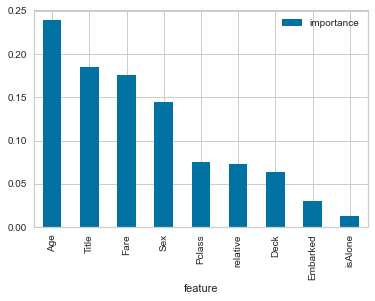

In [59]:
importances.plot.bar()

**Results**

'isAlone' and 'Embarked' don't play a significant role in the Random Forest classifiers prediction process. Thus, I will drop them from the DataFrame and train the classifier once again. We could also remove more features, however, this would inquire more investigations of the feature's effect on our model. For now, I will only remove those two from the DataFrame.

In [60]:
# Dropping not_alone
train_df  = train_df.drop("isAlone", axis=1)
test_df  = test_df.drop("isAlone", axis=1)
# Dropping Parch
train_df  = train_df.drop("Embarked", axis=1)
test_df  = test_df.drop("Embarked", axis=1)

In [61]:
# Reassigning features
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

**Training the Random Forest classifier once again**

In [63]:
rf = RandomForestClassifier(n_estimators=100, oob_score = True)
rf.fit(X_train, Y_train)
Y_prediction = rf.predict(X_test)
rf.score(X_train, Y_train)

acc_rf = round(rf.score(X_train, Y_train) * 100, 2)
print("The accuracy is ==> ", round(acc_rf,2,), "%")

cv = cross_val_score(rf,X_train,Y_train,cv=5)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The accuracy is ==>  96.52 %
The cross-validation score is ==>  [0.80446927 0.79213483 0.87640449 0.79775281 0.84831461]
The cv score mean is ==>  0.8238152030632101


**Feature importance without 'isAlone' and 'Embarked' features**

In [64]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(12)

,importance
feature,
Age,0.246
Fare,0.191
Sex,0.186
Title,0.155
relative,0.083
Pclass,0.077
Deck,0.062


<AxesSubplot:xlabel='feature'>

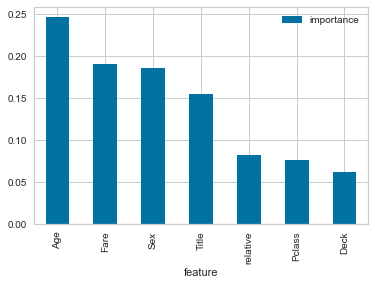

In [65]:
importances.plot.bar()

The Random Forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa.

##### **6.3: Hyperparameter Tuning**

In [66]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [54]:
# lr = LogisticRegression()
# param_grid = {'max_iter' : [2000],
#             'penalty' : ['l1', 'l2'],
#             'C' : np.logspace(-4, 4, 20),
#             'solver' : ['liblinear']}

# clf_lr = GridSearchCV(lg, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
# best_clf_lr = clf_lr.fit(X_train,Y_train)
# clf_performance(best_clf_lr,'Logistic Regression')

# svc = SVC(probability = True)
# param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
#                                 'C': [.1, 1, 10, 100, 1000]},
#                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
#                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
# clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
# best_clf_svc = clf_svc.fit(X_train,Y_train)
# clf_performance(best_clf_svc,'SVC')

# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors' : [3,5,7,9],
#             'weights' : ['uniform', 'distance'],
#             'algorithm' : ['auto', 'ball_tree','kd_tree'],
#             'p' : [1,2]}
# clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
# best_clf_knn = clf_knn.fit(X_train,Y_train)
# clf_performance(best_clf_knn,'KNN')

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500],
            'criterion':['gini','entropy'],
            'bootstrap': [True],
            'max_depth': [15, 20, 25],
            'max_features': ['auto','sqrt', 10],
            'min_samples_leaf': [2,3],
            'min_samples_split': [2,3]}
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,Y_train)

clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest
Best Score: 0.8451258552507689
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,Y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

**Testing best parameters**

We can use something called Out of Bag (OOB) score to estimate the generalization accuracy. Basically, the OOB score is computed as the number of correctly predicted rows from the out of the bag sample.

In [68]:
rf = RandomForestClassifier(criterion = "gini", max_depth = 20,max_features='sqrt',min_samples_leaf = 3, min_samples_split = 2,n_estimators=450,oob_score=True, random_state=1, n_jobs=-1)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

rf.score(X_train, Y_train)
print("The oob score is ==> ", round(rf.oob_score_, 4)*100, "%")

cv = cross_val_score(rf,X_train,Y_train,cv=5)
print("The cross-validation score is ==> ",cv)
print("The cv score mean is ==> ",cv.mean())

The oob score is ==>  82.38 %
The cross-validation score is ==>  [0.82122905 0.80337079 0.87640449 0.79213483 0.84269663]
The cv score mean is ==>  0.8271671583704727


##### **6.4: Further evaluation**

**Confusion Matrix**

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
pred = cross_val_predict(rf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, pred)

array([[490,  59],
       [ 90, 252]], dtype=int64)

The first row is about the not-survived-predictions: 494 passengers were correctly classified as not survived (called true negatives) and 59 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 93 passengers where wrongly classified as survived (false negatives) and 244 where correctly classified as survived (true positives).

A confusion matrix produces an idea of how accurate the model is.

**Precision and Recall**

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:", precision_score(Y_train, pred))
print("Recall:",recall_score(Y_train, pred))
print("F1-score:",f1_score(Y_train, pred))

Precision: 0.8102893890675241
Recall: 0.7368421052631579
F1-score: 0.7718223583460949


Our model predicts correctly that a passenger survived 81% of the time (precision). The recall tells us that 73% of the passengers tested actually survived.

It is possible to combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall.

There we have it, a 76% F-score. The score is not high because we have a recall of 71%. Unfortunately, the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This can be a problem because often times we are searching for a high precision and other times a high recall. An increase of precision can result in a decrease of recall, and vice versa (depending on the threshold). This is called the **precision/recall trade-off**.

**Precision Recall Curve**

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part in this process.

Let's plot the precision and recall with the threshold using matplotlib.

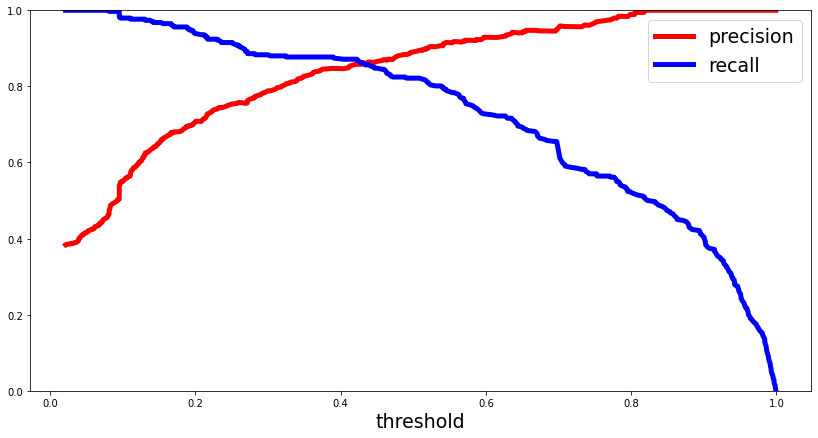

In [58]:
from sklearn.metrics import precision_recall_curve
# Getting the probabilities of our predictions
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)

We can see in the graph above that the recall is falling of rapidly when the precision reaches around 85%. Thus, we may want to select the precision/recall trade-off before this point (maybe at around 75%).

Now we are able to choose a threshold, that gives the best precision/recall trade-off for the current problem. For example, if a precision of 80% is required, we can easily look at the plot and identify the threshold needed, which is around 0.4. Then we could train the model with exactly that threshold and expect the desired accuracy.

**Another way is to plot the precision and recall against each other:**

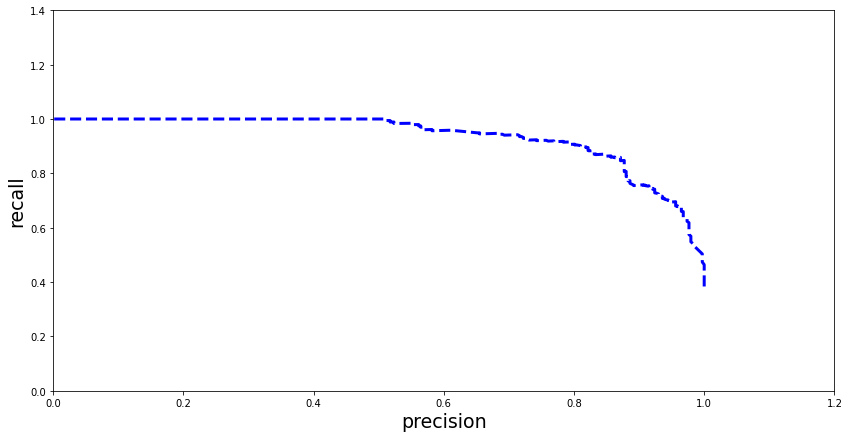

In [59]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--", linewidth=3)
    plt.xlabel("precision", fontsize=19)
    plt.ylabel("recall", fontsize=19)
    plt.axis([0, 1.2, 0, 1.4])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)

**ROC AUC Curve**

Another way to evaluate and compare binary classifiers is the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall values.

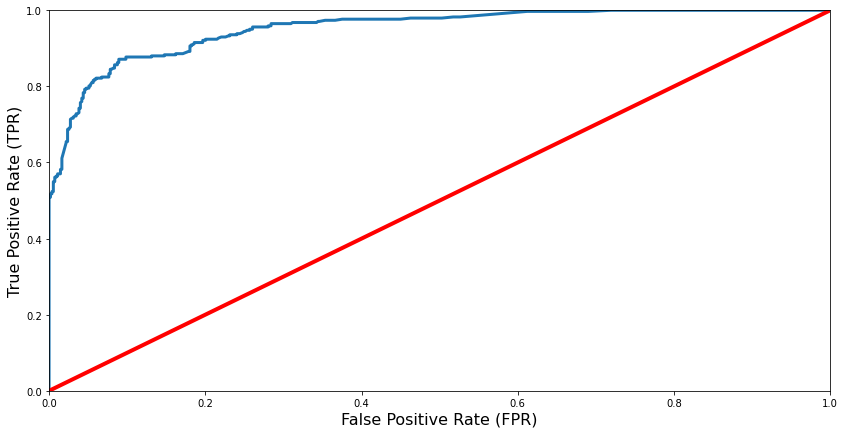

In [60]:
from sklearn.metrics import roc_curve
# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)

The red line represents a purely random classifier (e.g. a coin flip). Thus, the classifier should be as far away from it as possible. The Random Forest model looks good.

There's a tradeoff here because the classifier produces more false positives the higher the true positive rate is.

**ROC AUC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifier that is 100% correct would have a ROC AUC Score of 1, and a completely random classifier would have a score of 0.5.

In [61]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9515466717796313


**7: Conclusion**

We started this project by doing exploratory data analysis (EDA) where we got a feeling for the data, checked missing data, and learned which features are important. During this process we used seaborn and matplotlib to do visualizations and understand better the data. During the Feature Engineering and Data Processing part we computed missing values, converted features into numeric ones, grouped values into categories, and created new features. Afterwards, we trained 7 different machine learning models, picked the best of them (Random Forest), and applied cross validation on the model. Then, we discussed how Random Forest works, took a look at the importance it assigns to the different features, and tuned its performace through optimizing hyperparameter values. Lastly, we looked at Confusion Matrix and computed the models precision, recall and F-score.

Below you can see the final train_df DataFrame:

In [69]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,relative,Deck,Title
0,0,3,0,22,7,1,8,1
1,1,1,1,38,71,1,3,3
2,1,3,1,26,7,0,8,2
3,1,1,1,35,53,1,3,3
4,0,3,0,35,8,0,8,1


In [26]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

This was my first submission to the competition site Kaggle. Any suggestions to improve my scores are most welcome.

In [28]:
gs = pd.read_csv("submission.csv")
gs.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
